In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
path_to_data = r"../data/raw/stock prices"

In [3]:
# Get the list of all csv files in path_to_data and all subfolders
csv_files = []
for root, dirs, files in os.walk(path_to_data):
    for f in files:
        if f.endswith('.csv'):
            csv_files.append(os.path.join(root, f))
csv_files

['../data/raw/stock prices\\aal_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\algt_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\alk_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\dal_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\jblu_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\luv_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\ual_intraday-15min_historical-data-05-30-2025.csv']

In [5]:
test = '../data/raw/stock prices\\aal_intraday-15min_historical-data-05-30-2025.csv'
# extract ticker, which is the word preceding the first underscore in the filename
os.path.basename(test).split('_')[0].upper()


'AAL'

In [12]:
# Loop through the files, limiting columns and appending to a df
for file in csv_files:
    if file == csv_files[0]:
        df_main = pd.read_csv(file)
        # extract ticker, which is the word preceding the first underscore in the filename
        df_main['ticker'] = os.path.basename(file).split('_')[0].upper()
    else:
        df_temp = pd.read_csv(file)
        # extract ticker, which is the word preceding the first underscore in the filename
        df_temp['ticker'] = os.path.basename(file).split('_')[0].upper()
        df_main = pd.concat([df_main, df_temp], ignore_index=True)

In [21]:
df_main = df_main.dropna()
# Convert 'Time' column to datetime format
df_main['Time'] = pd.to_datetime(df_main['Time'], format='%Y-%m-%d %H:%M')
df_main['%Chg'] = df_main['%Chg'].str.replace('%', '').astype(float)
df_main

,Time,Open,High,Low,Last,Change,%Chg,Volume,ticker
0,2022-05-03 11:15:00,18.6900,18.7700,18.665,18.7450,0.0550,0.29,844892.0,AAL
1,2022-05-03 11:30:00,18.7450,18.8550,18.735,18.8350,0.0900,0.48,790483.0,AAL
2,2022-05-03 11:45:00,18.8400,18.8500,18.740,18.7761,-0.0589,-0.31,600037.0,AAL
3,2022-05-03 12:00:00,18.7703,18.8100,18.654,18.7272,-0.0489,-0.26,738723.0,AAL
4,2022-05-03 12:15:00,18.7300,18.8200,18.730,18.7400,0.0128,0.07,582906.0,AAL
...,...,...,...,...,...,...,...,...,...
139994,2025-05-30 14:45:00,79.2600,79.6200,79.180,79.4800,0.2300,0.29,144655.0,UAL
139995,2025-05-30 15:00:00,79.4900,79.7650,79.420,79.5200,0.0400,0.05,169821.0,UAL
139996,2025-05-30 15:15:00,79.5500,79.9600,79.420,79.9100,0.3900,0.49,402686.0,UAL
139997,2025-05-30 15:30:00,79.9200,80.0649,79.560,79.7600,-0.1500,-0.19,232344.0,UAL


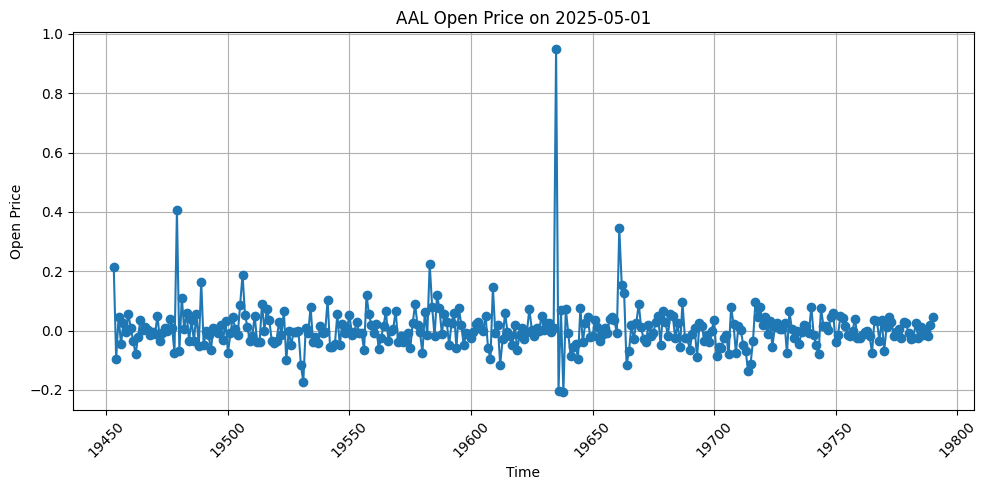

In [19]:
# Line plot of open price for AAL where date between 2025-05-01 and 2025-05-10
import matplotlib.pyplot as plt
df_aal = df_main[df_main['ticker'] == 'AAL']
df_aal = df_aal[(df_aal['Time'] >= '2025-05-01') & (df_aal['Time'] <= '2025-05-20')]
plt.figure(figsize=(10, 5))
plt.plot(df_aal.index, df_aal['Change'], marker='o', linestyle='-')
plt.title('AAL Open Price on 2025-05-01')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()


(-2.0, 2.0)

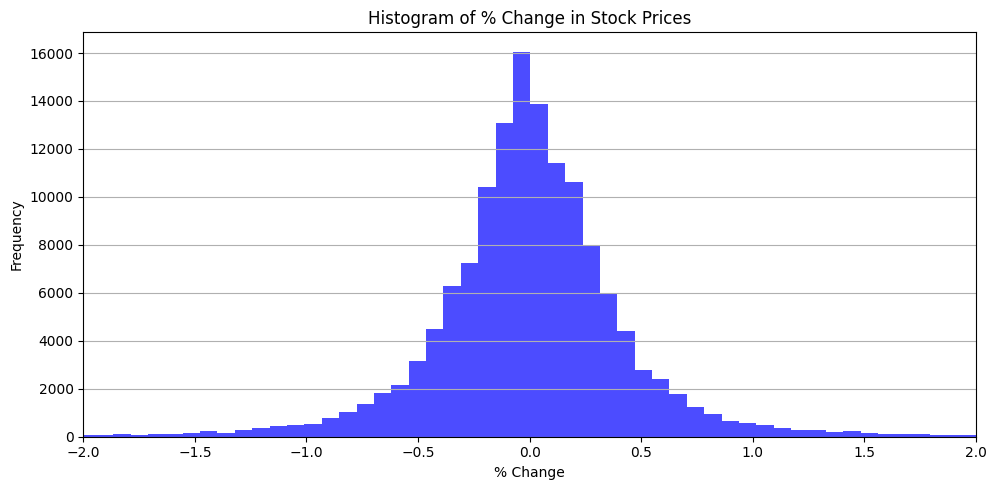

In [26]:
# histogram of %Chg
plt.figure(figsize=(10, 5))
plt.hist(df_main['%Chg'], bins=500, color='blue', alpha=0.7)
plt.title('Histogram of % Change in Stock Prices')
plt.xlabel('% Change')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.xlim(-2,2)

## Feature Engineering

### Vars
- High-Low spread
- High-Low % spread
- Close-Open spread
- Close-Open % spread


### Lags
- 

### Dummies
- Day of week
- Hour of day
- Month of year
- First observation per day